<a href="https://colab.research.google.com/github/KomalT2003/ImageProcessing/blob/main/MORPHOLOGICALPATTERN_DETECTION_EXP9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

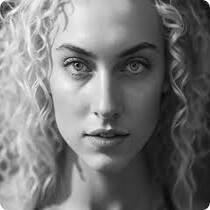

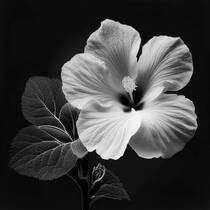

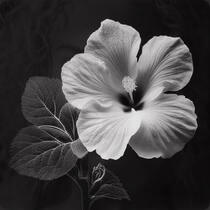

In [ ]:
#code to morph image (SAME DIMENSION GRAYSCALE IMAGES)
import cv2
import numpy as np

def morph_images(img1, img2, alpha):
    if alpha < 0 or alpha > 1:
        raise ValueError("Alpha must be between 0 and 1")


    image1 = cv2.imread(img1)
    image2 = cv2.imread(img2)


    image1 = np.float32(image1)
    image2 = np.float32(image2)


    if image1.shape != image2.shape:
        raise ValueError("Both images must have the same dimensions")


    morphed_image = cv2.addWeighted(image1, 1 - alpha, image2, alpha, 0)


    morphed_image = np.uint8(morphed_image)

    # Resize the result image to match the dimensions of the first input image
    original_dimensions = (image1.shape[1], image1.shape[0])
    morphed_image_resized = cv2.resize(morphed_image, original_dimensions)

    return morphed_image_resized, image1, image2


img1_path = "/content/lena2 (1).jpg"
img2_path = "/content/flower2 (1).jpg"


alpha_value = 0.9
result_image,image1,image2= morph_images(img1_path, img2_path, alpha_value)


from google.colab.patches import cv2_imshow
cv2_imshow(image1)
cv2_imshow(image2)
cv2_imshow(result_image)

output_path = "/content/morphed.jpg"
cv2.imwrite(output_path, result_image)

cv2.waitKey(0)
cv2.destroyAllWindows()



0.8689921855684509


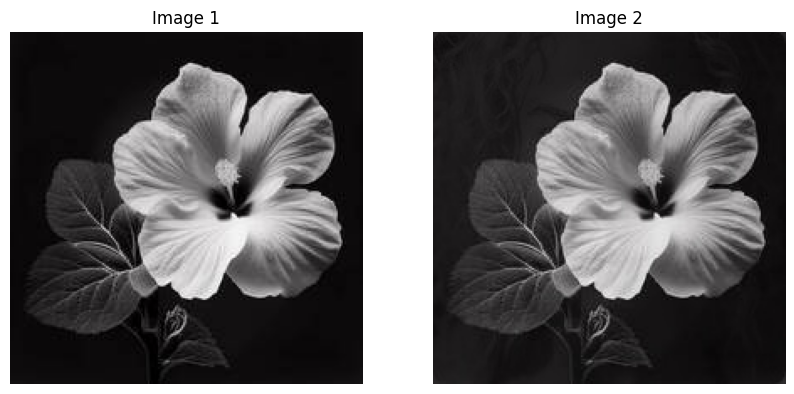

Images are morphed or different


In [ ]:
#instead of histogram(old technique) ssim : structural similarity index used rest same
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

def perform_opening(image):

    for _ in range(3):
        kernel_size = 3 + _
        kernel = np.ones((kernel_size, kernel_size), np.uint8)
        image = cv2.erode(image, kernel, iterations=1)
        image = cv2.dilate(image, kernel, iterations=1)
    return image

def compare_images(image1, image2):

    image1_opened = perform_opening(image1)
    image2_opened = perform_opening(image2)


    ssim_index, _ = ssim(image1_opened, image2_opened, win_size=3, full=True)
    print(ssim_index)

    threshold = 0.90

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Image 1')
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Image 2')
    axes[1].axis('off')

    plt.show()

    return ssim_index >= threshold

image1 = cv2.imread("/content/flower2 (1).jpg")
image2= cv2.imread("/content/morphed.jpg")

image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

result = compare_images(image1, image2)

if result:
    print("Images are similar.")
else:
    print("Images are morphed or different")
